In [1]:
pip install pandas numpy scikit-learn matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
# === Libraries ===
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense



In [5]:
import os
from pathlib import Path

# Set working directory to Downloads
downloads_path = Path.home() / "Downloads"
os.chdir(downloads_path)

In [6]:
# === Load your data ===
df = pd.read_csv("Tesla Stock Price.csv") # Use your actual file
# For demo, assume Date is already index and data cleaned

In [28]:
# For safety, sort chronologically
df = df.sort_index()

In [29]:

# ===== 3. Scale the Price Column =====
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(df[['Price']])

In [31]:
# ===== 4. Create LSTM Sequences (Window size = 12 months) =====
window_size = 12
X_lstm, y_lstm = [], []

for i in range(window_size, len(scaled_prices)):
    X_lstm.append(scaled_prices[i-window_size:i])
    y_lstm.append(scaled_prices[i])

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

# Check shapes
print("X_lstm shape:", X_lstm.shape)  

X_lstm shape: (48, 12, 1)


In [32]:

# ===== 5. Train-Test Split =====
split_index = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split_index], X_lstm[split_index:]
y_train, y_test = y_lstm[:split_index], y_lstm[split_index:]

In [33]:

# ===== 6. Define the LSTM Model =====
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [34]:

# ===== 7. Train the Model =====
model.fit(X_train, y_train, epochs=20, batch_size=8, verbose=1)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2663  
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1820 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1575 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0941 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0856 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0502 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0427 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0421 
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0484 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0477 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0451 
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0410 
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0351 
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0401 
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━

In [35]:
# ===== 8. Make Predictions =====
y_pred_scaled = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [36]:
# Inverse transform predictions and actuals
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)


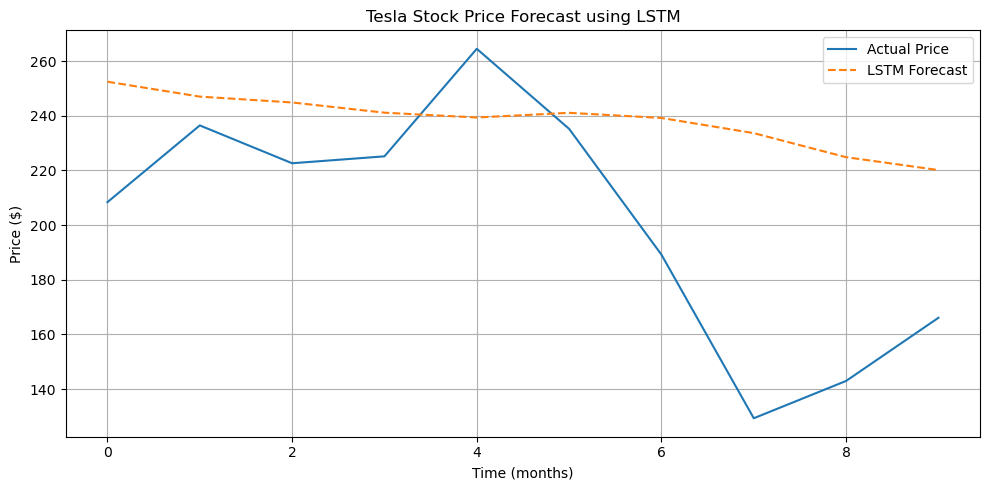

In [37]:

# ===== 9. Plot the Results =====
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(y_pred, label='LSTM Forecast', linestyle='--')
plt.title("Tesla Stock Price Forecast using LSTM")
plt.xlabel("Time (months)")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
# Reuse your existing df (should have 'Price' column and datetime index)
df['Lag1'] = df['Price'].shift(1)
df['Lag2'] = df['Price'].shift(2)

# Drop missing values from lags
df_ml = df.dropna()

# Features and target
X = df_ml[['Lag1', 'Lag2']]
y = df_ml['Price']

# Train-test split (same 80-20 logic)
train_size = int(0.8 * len(df_ml))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
dt_pred = dt_model.predict(X_test)

# Evaluate
print("Decision Tree RMSE:", mean_squared_error(y_test, dt_pred, squared=False))
print("Decision Tree R² Score:", r2_score(y_test, dt_pred))

Decision Tree RMSE: 42.451628944011084
Decision Tree R² Score: -0.16717007790464322


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
from sklearn.ensemble import RandomForestRegressor

# Train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
print("Random Forest RMSE:", mean_squared_error(y_test, rf_pred, squared=False))
print("Random Forest R² Score:", r2_score(y_test, rf_pred))

Random Forest RMSE: 34.57608834611485
Random Forest R² Score: 0.22572159883264087


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


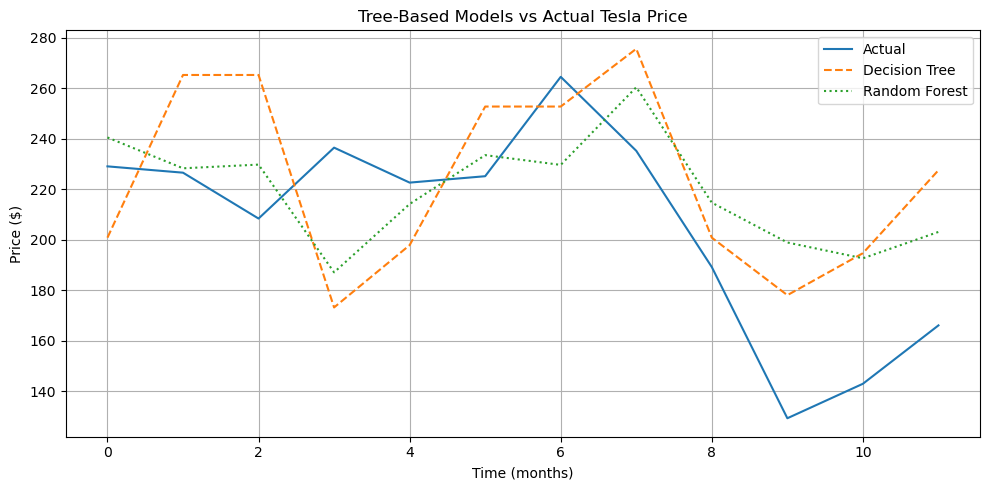

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(dt_pred, label='Decision Tree', linestyle='--')
plt.plot(rf_pred, label='Random Forest', linestyle=':')
plt.title("Tree-Based Models vs Actual Tesla Price")
plt.xlabel("Time (months)")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:



# ===== 10. Print Evaluation Metrics =====
rmse = mean_squared_error(y_test_actual, y_pred, squared=False)
r2 = r2_score(y_test_actual, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 51.45
R² Score: -0.5200


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
